<a href="https://colab.research.google.com/github/Nelson23578/HW1/blob/main/%E5%8A%A0%E5%B7%9E%E6%88%BF%E5%83%B9%E8%B3%87%E6%96%99%E9%9B%86DNN%E5%AF%A6%E4%BD%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**步驟 1：匯入所有我們需要的函式庫**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing # 用來直接下載我們這次要用的資料集

**步驟2：載入資料集與檢視資料概況**

In [ ]:
# 1.載入資料
california_housing = fetch_california_housing(as_frame=True)
df = california_housing.frame

# 2.建立欄位名稱的對照
new_column_names = {
    'MedInc': 'MedInc (收入中位數)',
    'HouseAge': 'HouseAge (屋齡中位數)',
    'AveRooms': 'AveRooms (平均房間數)',
    'AveBedrms': 'AveBedrms (平均臥室數)',
    'Population': 'Population (區域人口)',
    'AveOccup': 'AveOccup (平均入住人數)',
    'Latitude': 'Latitude (緯度)',
    'Longitude': 'Longitude (經度)',
    'MedHouseVal': 'MedHouseVal (房價中位數)'
}
df = df.rename(columns=new_column_names)

# 3.顯示資料集前五筆資料
df.head()

,MedInc (收入中位數),HouseAge (屋齡中位數),AveRooms (平均房間數),AveBedrms (平均臥室數),Population (區域人口),AveOccup (平均入住人數),Latitude (緯度),Longitude (經度),MedHouseVal (房價中位數)
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


**步驟 3：資料前處理**

In [ ]:
# 1.分離特徵(X)和目標(y)
# 特徵 X 是除了房價以外的所有欄位
X = df.drop('MedHouseVal (房價中位數)', axis=1)
# 目標 y 就是我們要預測的 MedHouseVal 欄位
y = df['MedHouseVal (房價中位數)']

# 2.切割訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"原始資料總共有 {len(df)} 筆")
print(f"切割後，訓練集有 {len(X_train)} 筆")
print(f"切割後，測試集有 {len(X_test)} 筆")


# 3.特徵標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # 使用訓練集的資料來學習標準化的規則 (計算平均值和標準差)，然後直接「應用」這個規則在訓練集上
X_test_scaled = scaler.transform(X_test) # 使用同樣的規則來轉換測試集，確保兩邊的標準一致

# 看看標準化之後的資料長什麼樣子
print("標準化之後的訓練資料 (前5筆):")
X_train_scaled[:5]

原始資料總共有 20640 筆
切割後，訓練集有 16512 筆
切割後，測試集有 4128 筆
標準化之後的訓練資料 (前5筆):


array([[-0.326196  ,  0.34849025, -0.17491646, -0.20836543,  0.76827628,
         0.05137609, -1.3728112 ,  1.27258656],
       [-0.03584338,  1.61811813, -0.40283542, -0.12853018, -0.09890135,
        -0.11736222, -0.87669601,  0.70916212],
       [ 0.14470145, -1.95271028,  0.08821601, -0.25753771, -0.44981806,
        -0.03227969, -0.46014647, -0.44760309],
       [-1.01786438,  0.58654547, -0.60001532, -0.14515634, -0.00743434,
         0.07750687, -1.38217186,  1.23269811],
       [-0.17148831,  1.14200767,  0.3490073 ,  0.08662432, -0.48587717,
        -0.06883176,  0.5320839 , -0.10855122]])

**步驟 4：建立 DNN 模型**

In [ ]:
# 1.讓學生可以調整的參數(Hyperparameters)
first_layer_neurons = 64   # 第一個隱藏層的神經元數量
second_layer_neurons = 32  # 第二個隱藏層的神經元數量
dropout_rate = 0.2         # Dropout的比例 (0.5代表隨機關閉50%的神經元)
input_shape = [X_train_scaled.shape[1]] # 輸入資料的維度(特徵數量)，以此資料集來說是9(欄位數量)

# 2.堆疊模型架構
model = keras.Sequential([
    # 輸入層：告訴模型輸入資料的形狀
    layers.InputLayer(input_shape=input_shape),

    # 第一個隱藏層
    layers.Dense(units=first_layer_neurons, activation='relu'),

    # 加入Dropout層來防止過擬合
    layers.Dropout(rate=dropout_rate),

    # 第二個隱藏層
    layers.Dense(units=second_layer_neurons, activation='relu'),

    # 輸出層：只有1個神經元，因為我們只預測一個房價數值
    layers.Dense(units=1)
])


# 3.顯示模型摘要
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

**步驟 5：編譯模型**

In [ ]:
# 建立一個Adam優化器來編譯模型，並手動設定較低的學習率
custom_optimizer = keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=custom_optimizer,loss='mean_squared_error',metrics=['mean_absolute_error'])

**步驟 6：訓練模型**

In [ ]:
# 1.讓學生可以調整的參數
epochs = 100       # 訓練的週期數
batch_size = 128   # 每批次訓練的資料筆數

# 2.開始訓練模型
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test_scaled, y_test),
    verbose=1
)

print("\n模型訓練完成！")

Epoch 1/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 3.4848 - mean_absolute_error: 1.4694 - val_loss: 0.7705 - val_mean_absolute_error: 0.6397
Epoch 2/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8035 - mean_absolute_error: 0.6450 - val_loss: 0.5957 - val_mean_absolute_error: 0.5555
Epoch 3/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6261 - mean_absolute_error: 0.5700 - val_loss: 0.4869 - val_mean_absolute_error: 0.4877
Epoch 4/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5168 - mean_absolute_error: 0.5120 - val_loss: 0.4333 - val_mean_absolute_error: 0.4634
Epoch 5/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4797 - mean_absolute_error: 0.4924 - val_loss: 0.4169 - val_mean_absolute_error: 0.4644
Epoch 6/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4404 - mean_absolute_error: 0.4782 - val_loss: 0.4002 - val_mean_absolute_error: 0.4473
Epoch 7/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4587 - mean_absolute_error: 0.4

**步驟 7：視覺化模型成效**

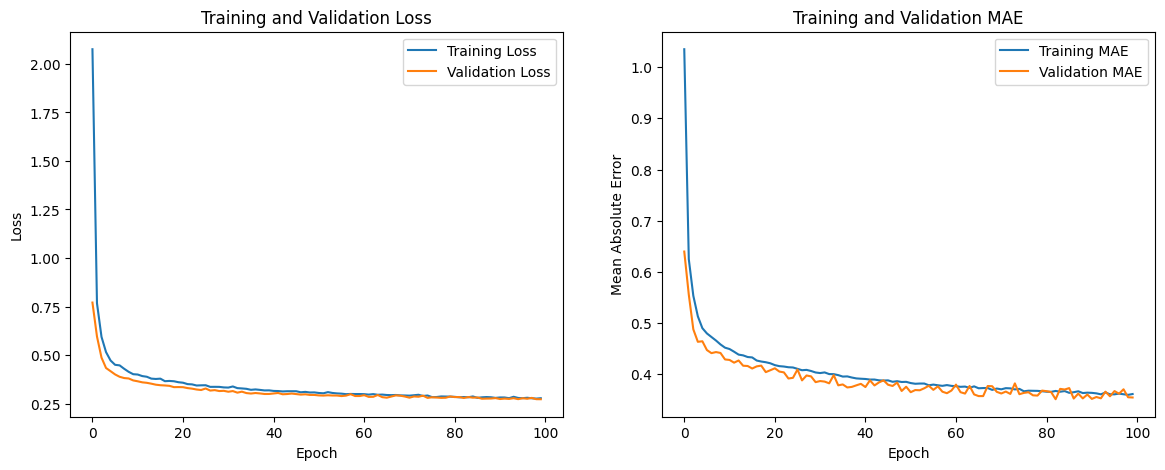


模型在測試集上的最終 MAE: 0.3546
這代表我們的模型預測房價，平均誤差約為 $35456.68 美金

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


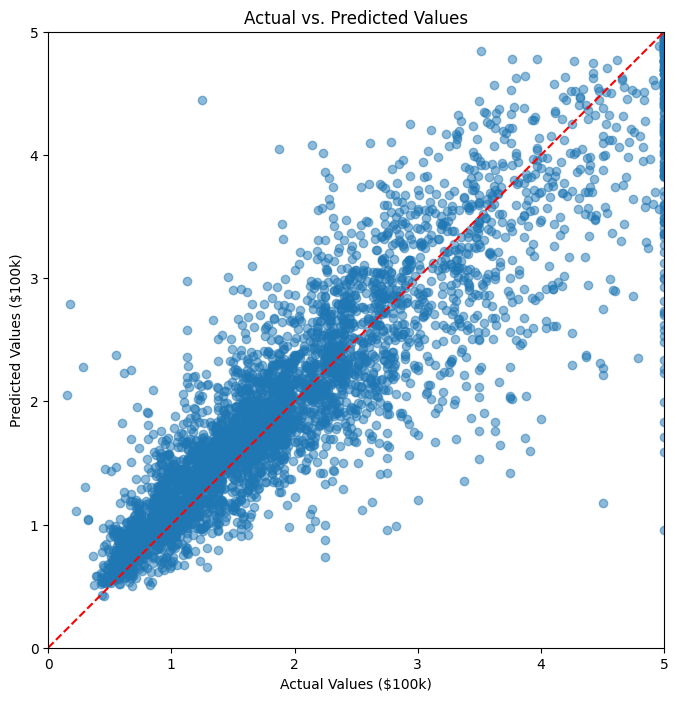

In [ ]:
# 1.畫出學習曲線
history_df = pd.DataFrame(history.history) # 將history物件中的紀錄轉換DataFrame，方便繪圖

plt.figure(figsize=(14, 5))

# 圖1：損失值(Loss)
plt.subplot(1, 2, 1)
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 圖2：平均絕對誤差(MAE)
plt.subplot(1, 2, 2)
plt.plot(history_df['mean_absolute_error'], label='Training MAE')
plt.plot(history_df['val_mean_absolute_error'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()


# 2.在測試集上進行最終評估
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print("\n" + "="*50)
print(f"模型在測試集上的最終 MAE: {test_mae:.4f}")
print(f"這代表我們的模型預測房價，平均誤差約為 ${test_mae*100000:.2f} 美金")
print("="*50 + "\n")


# 3.畫出真實值與預測值的散佈圖
# 讓模型對測試集進行預測
test_predictions = model.predict(X_test_scaled).flatten() # .flatten()將結果轉為一維陣列

plt.figure(figsize=(8, 8))
plt.scatter(y_test, test_predictions, alpha=0.5)
plt.xlabel('Actual Values ($100k)')
plt.ylabel('Predicted Values ($100k)')
plt.title('Actual vs. Predicted Values')

# 畫一條y=x的對角線，方便比對
# 如果點都落在線上，代表預測完美
plt.plot([0, 5], [0, 5], color='red', linestyle='--')
plt.xlim([0, 5])
plt.ylim([0, 5])
plt.gca().set_aspect('equal', adjustable='box') # 讓x,y軸等比例
plt.show()